# Task 1
## Name :- Lalit Patel
# Linear Regression with Python scikit learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.


# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
%matplotlib inline

In [2]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data.head()

Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe().transpose()

count    mean        std   min   25%   50%   75%   max
Hours    25.0   5.012   2.525094   1.1   2.7   4.8   7.4   9.2
Scores   25.0  51.480  25.286887  17.0  30.0  47.0  75.0  95.0

In [36]:
data.hist()

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

In [5]:
sns.pairplot(data,diag_kind="kde")

<AxesSubplot:>

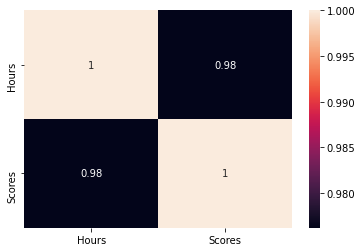

In [11]:
sns.heatmap(data.corr(), annot=True)

# Here the heatmap shows positive correlation between the Hours column and Scores column.
### Now let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:


In [12]:
data.plot("Hours","Scores",linestyle = "--",marker = "o",markersize = "10",markerfacecolor = "red", figsize=(10,8))

<AxesSubplot:xlabel='Hours'>

In [14]:
data.plot(x='Hours', y='Scores', style='o', figsize=(10,8))  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [16]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:


In [17]:
from sklearn.model_selection import train_test_split

# Training the Algorithm
### We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [21]:
Regression_model=lr()
Regression_model.fit(x_train,y_train)

LinearRegression()

Training complete.

In [39]:
Regression_model.score(x_test,y_test)

0.8980888932690286

In [27]:
# Plotting the regression line
line = Regression_model.coef_*x+Regression_model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [29]:
print(x_test) # Testing data - In Hours
y_pred =Regression_model.predict(x_test) # Predicting the scores

    Hours
14    1.1
13    3.3
17    1.9
3     8.5
21    4.8
10    7.7
18    6.1


In [30]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

Actual  Predicted
0      17  10.151901
1      42  32.739761
2      24  18.365669
3      75  86.129249
4      54  48.140575
5      85  77.915481
6      67  61.487947

In [32]:
hours = 9.25
own_pred = Regression_model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.82965552496633


Therfore, the predicted score if a student studies for 9.25 hrs/day is about 93.69.

## Disclaimer:- You can use your own data in this and predict the score accordingly.

# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [40]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 7.332559178000707


This concludes Task 1

 # Thank You !